# Exploratory Data Analysis for IMDB Galaxy

This project is about working on the IMDB Movie data  , doing some data wrangling cleaning , performing EDA and producing some valuable outputs and recommendations for the future success of sussex Bugdet Productions


###  **Step 1** : Importing libraries and fetching the IMDB csv file data in our notebook

Going forward we will import more based on requirements

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t
df = pd.read_csv(r"C:\Users\rs826\Downloads\movie_metadata.csv")
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


###  **Step 2** :  Having an overview of the whole data to begin with wrangling and cleaning 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

**We can see there are 5043 entries and 28 columns and few observations**

1. Lot of NAN values in almost many columns

2. Long names of the columns

3. Some unecessary columns

4. some columns to be added


###  **Step 3**: Wrangling and Cleaning 


**Removing all duplicate values in the data**

In [3]:
df.drop_duplicates(inplace=True)

**Dropping all NAN values and resetting the index**

In [4]:
df.dropna(inplace=True,axis=0)
df.reset_index(drop=True,inplace=True)

**Dropping the columns which I feel will serve no purpose in my EDA**

In [6]:
dropcolumns=["color","actor_2_name","actor_3_name","movie_title","movie_imdb_link","aspect_ratio","facenumber_in_poster","plot_keywords"]
df.drop(columns=dropcolumns,inplace=True)

**Renaming few columns to shorter names for easy understanding**

In [7]:
columns = {
    "num_critic_for_reviews" : "Critics","director_facebook_likes" : "Dir_fb_likes", "actor_3_facebook_likes" : "Act3_fb_likes",
"actor_1_facebook_likes" : "Act1_fb_likes","actor_1_name" : "Act1_name","cast_total_facebook_likes":"Cast_fb_likes",
"num_user_for_reviews":"Total_reviews","actor_2_facebook_likes":"Act2_fb_likes","movie_facebook_likes":"Movie_Fb_likes"}

df.rename(columns=columns,inplace=True)

**Adding an extra column "Profit" to do some better analysis**

In [9]:
df['profit'] = df['gross'] - df['budget']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   director_name    3723 non-null   object 
 1   Critics          3723 non-null   float64
 2   duration         3723 non-null   float64
 3   Dir_fb_likes     3723 non-null   float64
 4   Act3_fb_likes    3723 non-null   float64
 5   Act1_fb_likes    3723 non-null   float64
 6   gross            3723 non-null   float64
 7   genres           3723 non-null   object 
 8   Act1_name        3723 non-null   object 
 9   num_voted_users  3723 non-null   int64  
 10  Cast_fb_likes    3723 non-null   int64  
 11  Total_reviews    3723 non-null   float64
 12  language         3723 non-null   object 
 13  country          3723 non-null   object 
 14  content_rating   3723 non-null   object 
 15  budget           3723 non-null   float64
 16  title_year       3723 non-null   float64
 17  Act2_fb_likes 

Now we can see our data looks much better and the entries have been reduced from 5043 to 3723 dropping 1770 Rows and 7 Columns

**As I have to do analysis on the profit made by the movies I think movies which have had loss will serve no purpose to me so I am filtering out all those movies whose profit are below 0**


In [12]:
df = df[df['profit'] > 0]
df = df.sort_values(by='profit',ascending=False)
df.reset_index(drop=True,inplace=True)
df

,director_name,Critics,duration,Dir_fb_likes,Act3_fb_likes,Act1_fb_likes,gross,genres,Act1_name,num_voted_users,...,Total_reviews,language,country,content_rating,budget,title_year,Act2_fb_likes,imdb_score,Movie_Fb_likes,profit
0,James Cameron,723.00,178.00,0.00,855.00,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,33000,523505847.00
28,Colin Trevorrow,644.00,124.00,365.00,1000.00,3000.00,652177271.00,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,418214,...,1290.00,English,USA,PG-13,150000000.00,2015.00,2000.00,7.00,150000,502177271.00
25,James Cameron,315.00,194.00,0.00,794.00,29000.00,658672302.00,Drama|Romance,Leonardo DiCaprio,793059,...,2528.00,English,USA,PG-13,200000000.00,1997.00,14000.00,7.70,26000,458672302.00
2683,George Lucas,282.00,125.00,0.00,504.00,11000.00,460935665.00,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,911097,...,1470.00,English,USA,PG,11000000.00,1977.00,1000.00,8.70,33000,449935665.00
2727,Steven Spielberg,215.00,120.00,14000.00,548.00,861.00,434949459.00,Family|Sci-Fi,Henry Thomas,281842,...,515.00,English,USA,PG,10500000.00,1982.00,725.00,7.90,34000,424449459.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669,Craig Zobel,286.00,90.00,25.00,235.00,601.00,318622.00,Biography|Crime|Drama|Thriller,Dreama Walker,24668,...,175.00,English,USA,R,270000.00,2012.00,260.00,6.40,0,48622.00
3267,Steven Shainberg,163.00,104.00,30.00,296.00,769.00,4046737.00,Comedy|Drama|Romance,Jeremy Davies,67949,...,390.00,English,USA,R,4000000.00,2002.00,413.00,7.10,15000,46737.00
3678,Greg Harrison,43.00,78.00,7.00,142.00,308.00,191309.00,Drama|Mystery|Thriller,Amir Talai,2787,...,64.00,English,USA,R,150000.00,2004.00,249.00,5.50,98,41309.00
3194,Duncan Jones,415.00,97.00,0.00,372.00,18000.00,5009677.00,Drama|Mystery|Sci-Fi,Kevin Spacey,260607,...,485.00,English,UK,R,5000000.00,2009.00,572.00,7.90,47000,9677.00


Now I can see my Rows have reduced from 3723 to 1999 dropping 1724 columns

So I will start performing EDA on these 1999 rows and 21 columns

###  **Step 4**: Exploratory Data Analysis

**I am starting with a Heatmap to check the correlation of every column to have a better idea of which columns to work on** 

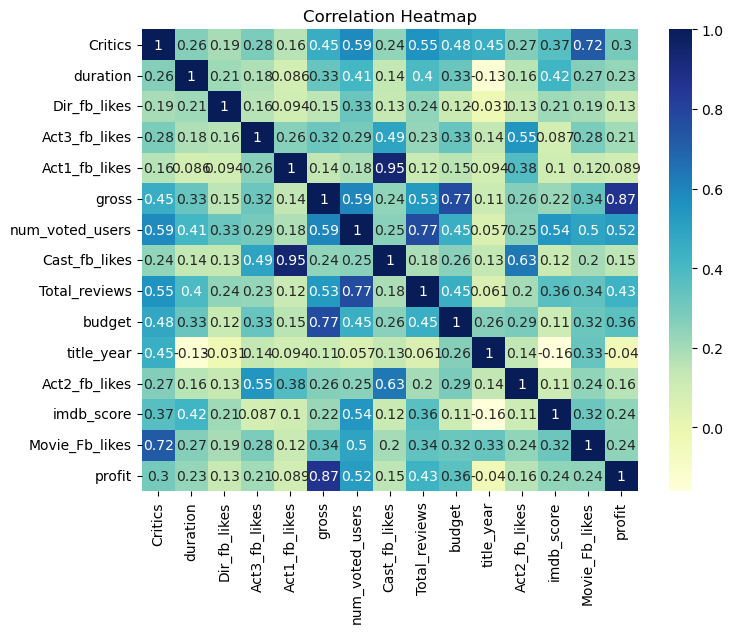

In [128]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

plt.title('Correlation Heatmap')
plt.show()

**As my main focus is on profit so I am looking which columns are correlated with profit**

1. Gross and Profit have a high correlation which is expected

2. Total Reviews and Num_Voted_users have a related with Profit but I dont think They would of much use to me

3. Its unexpected that Imdb and budget are showing very weak correlation with the profit

4. The Fb likes are not serving any purpose I think so they can be dropped from the dataset later

**Lets analyse deeper**

### 4.a) Plotting graphs for numerical columns

**Plotting a Scatter-Plot for Budget with Profit**

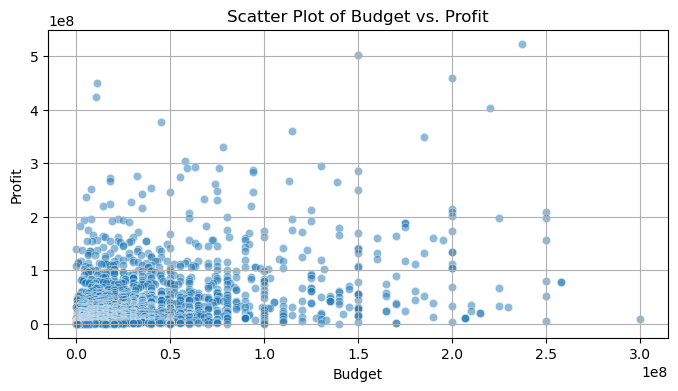

In [131]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='budget', y='profit', data=df, alpha=0.5)
plt.title('Scatter Plot of Budget vs. Profit')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

I dont see any significat relation between the two by looking at the graph will have to analyse deeper

**Plotting a Scatter-Plot for IMDb Score with Profit**

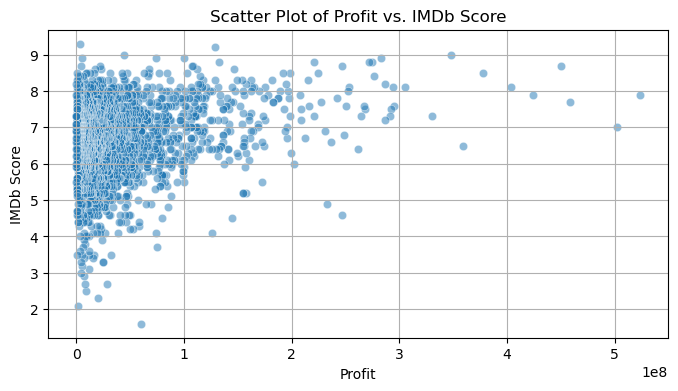

In [133]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='profit', y='imdb_score', data=df, alpha=0.5)
plt.title('Scatter Plot of Profit vs. IMDb Score')
plt.xlabel('Profit')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.show()

I dont see any significat relation but can see a little increase in the profit as the score increases but cannot claim on it without analysing more 

**Plotting a Scatter-Plot for Gross Score with Profit**

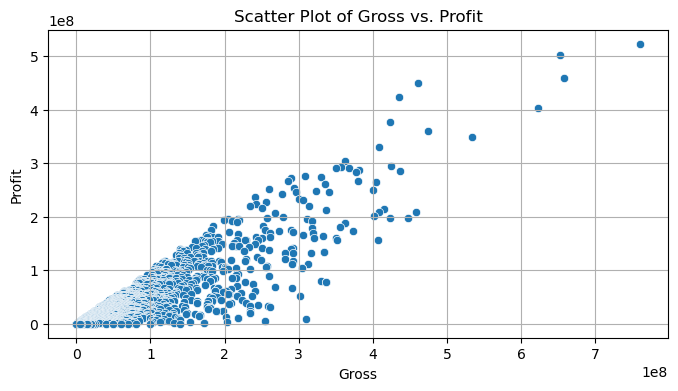

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='gross', y='profit', data=df)  
plt.title('Scatter Plot of Gross vs. Profit')
plt.xlabel('Gross')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


It is very clear from this graph that gross and profit share a strong linear relationship

**Plotting a Scatter-Plot for Critics with Profit**

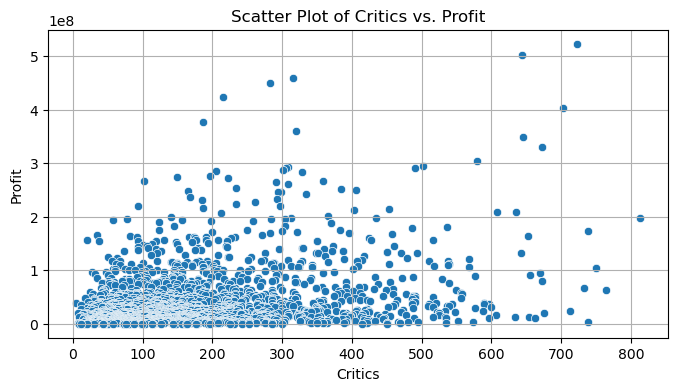

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Critics', y='profit', data=df)  
plt.title('Scatter Plot of Critics vs. Profit')
plt.xlabel('Critics')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


I cannot see any clear relationship 

**Plotting a Line-Plot for Imdb score and profit**

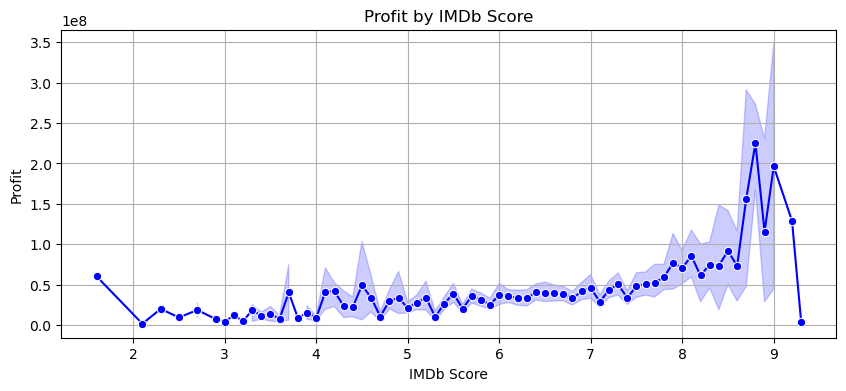

In [142]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='imdb_score', y='profit', data=df, marker='o', color='blue')
plt.title('Profit by IMDb Score')
plt.xlabel('IMDb Score')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

We can say that there ia a very slight increase in the profit as the imdb score increases but there are outliers as well

**Plotting a Line-Plot for Duration score and profit**

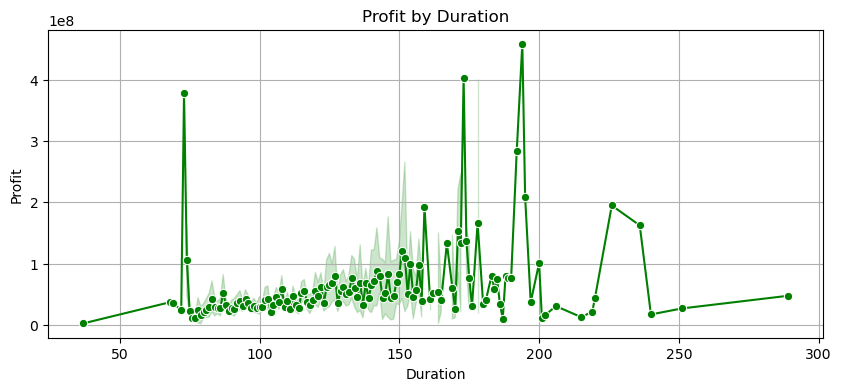

In [144]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='duration', y='profit', data=df, marker='o', color='green')
plt.title('Profit by Duration')
plt.xlabel('Duration')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

I Dont think I can interret much there are outliers . Before we go into deep analysis for numerical columns lets check cateogerical columns

### 4.b) Checking the correlations of cateogerical columns

**Genres happens to share a strong relationship with the profit , breaking the genres into different columns as they are clubbed and checking their frequency of occurances**

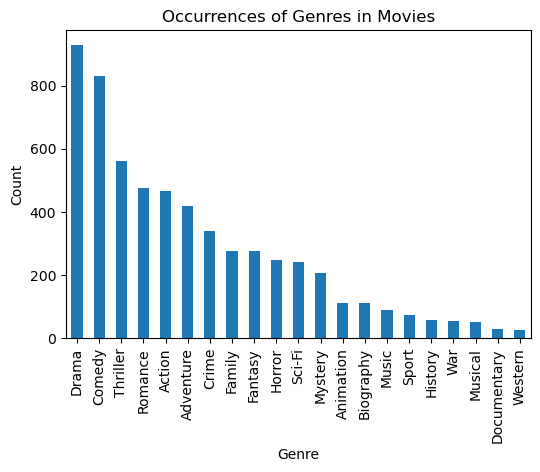

In [149]:
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()

plt.figure(figsize=(6, 4))
genre_counts.plot(kind='bar')
plt.title('Occurrences of Genres in Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


There are some Genres which are top performing now whether they have a relationship with the profit we need to check the average profit first

**Calculating the average profit of each genre**

In [171]:
#Creating a copy of the DataFrame
df_copy = df.copy()

# Create binary columns for each individual genre 
for genre in ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Horror',
    'Sci-Fi', 'Mystery', 'Animation', 'Biography', 'Music', 'Sport', 'History', 'War', 'Musical', 'Documentary', 'Western']:
     
        df_copy[genre] = df_copy['genres'].str.contains(genre).astype(int)

# Calculating the average profit 
average_profit_by_genre = {}
for genre in ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Horror',
    'Sci-Fi', 'Mystery', 'Animation', 'Biography', 'Music', 'Sport', 'History', 'War', 'Musical', 'Documentary', 'Western']:
    
    average_profit = df_copy[df_copy[genre] == 1]['profit'].sum()
    average_profit_by_genre[genre] = average_profit


average_profit_df = pd.DataFrame(list(average_profit_by_genre.items()), columns=['Genre', 'Average Profit'])

**Now combing the frequency plot with the profit average and checking whether they share any relation**

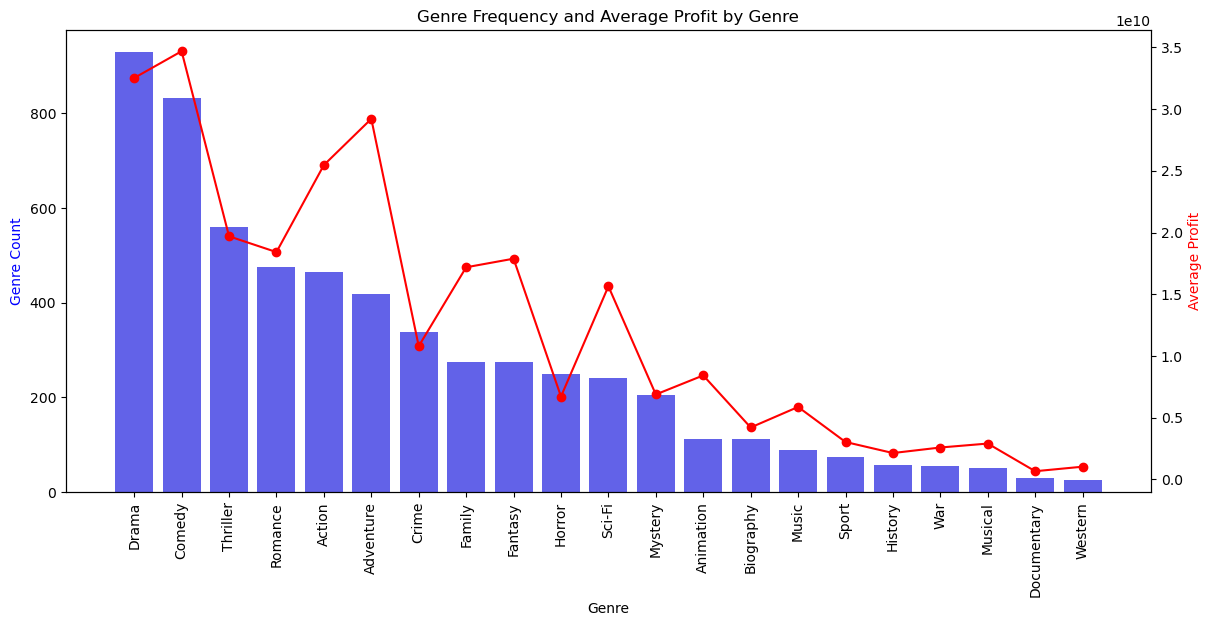

In [153]:
fig, ax1 = plt.subplots(figsize=(14, 6))

genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

sns.barplot(x='Genre', y='Count', data=genre_counts_df, color='blue', alpha=0.7, ax=ax1)

ax1.set_ylabel('Genre Count', color='blue')
ax2 = ax1.twinx()
ax2.plot(average_profit_df['Genre'], average_profit_df['Average Profit'], marker='o', linestyle='-', color='red')
ax2.set_ylabel('Average Profit', color='red')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

plt.xlabel('Genre')
plt.title('Genre Frequency and Average Profit by Genre')
plt.show()


It can be clearly seen that the Genres which are higher in frequency do also have a higher profit average and we can pretty well conclude that they might give a good output in terms of profit . ALthough the old movie of sussex budget product was also a thriller action and comedy but their must have been some loop holes

**Checking the correlation of Genres Frequency with the Average Profit**

In [154]:
#Converting Genres into Dataframe
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Genre Count': genre_counts.values})

# Merge genre counts with the average profit 
merged_df = pd.merge(genre_counts_df, average_profit_df, on='Genre')

correlation = merged_df['Genre Count'].corr(merged_df['Average Profit'])

print(f'Correlation between Genre Frequency and Average Profit: {correlation}')

Correlation between Genre Frequency and Average Profit: 0.9226325797092433


We can see there is a high correlation of 0.9 between average profit and frequency of Genres which is very strong 

**Now Checking the relationship of Director's name with the average profit**

Text(0, 0.5, 'Frequency')

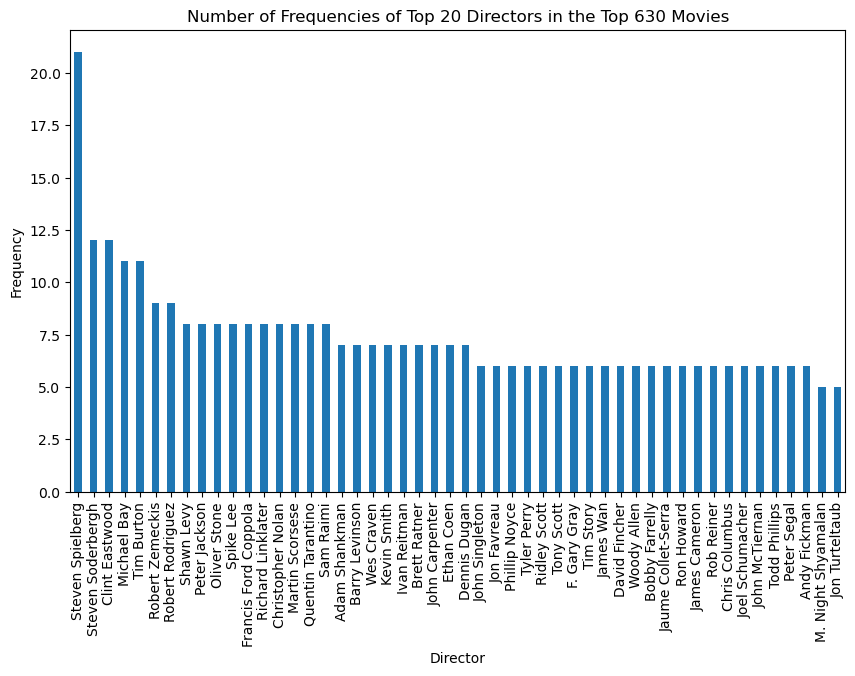

In [155]:
#As there are a lot of directors, will check for top 50
director_counts = df['director_name'].value_counts()
top_50_directors = director_counts.nlargest(50)


plt.figure(figsize=(10, 6))
top_50_directors .plot(kind='bar')
plt.title('Number of Frequencies of Top 50 Directors in the Top Movies')
plt.xlabel('Director')
plt.ylabel('Frequency')

Now we can see the top 50 directors and their frequencies , I want to check whether the average profit goes the same for them just like genres or not . So we will check top 50 average profits 

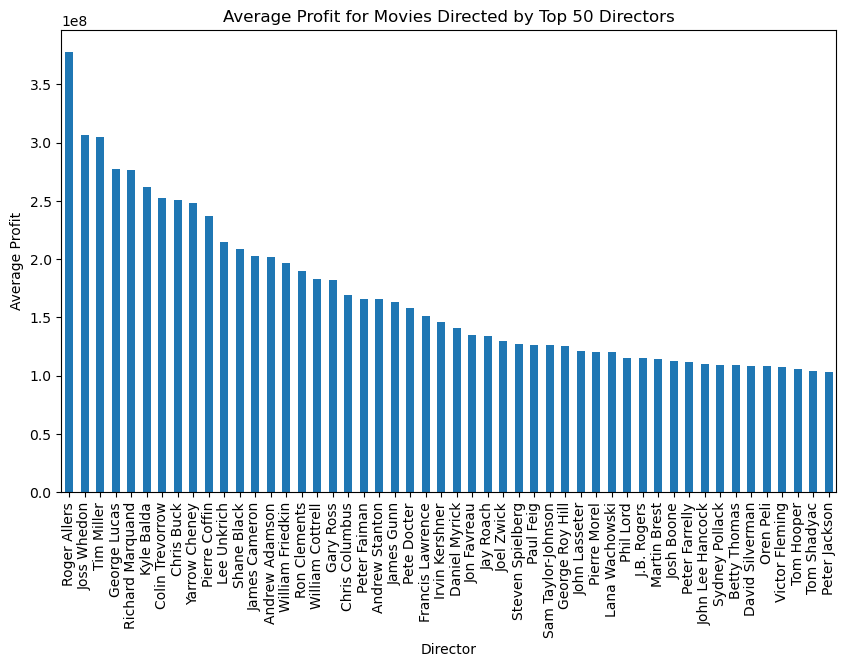

In [156]:

average_profit_by_director = df.groupby('director_name')['profit'].mean().nlargest(50)

plt.figure(figsize=(10, 6))
average_profit_by_director.plot(kind='bar')
plt.title('Average Profit for Movies Directed by Top 50 Directors')
plt.xlabel('Director')
plt.ylabel('Average Profit')
plt.show()


I can see that these names are not the same as in Top frequency of Directors. So lets do a little analysis

**Checking for common directors in top 50 directors of both the groups**

In [35]:
director_counts = df['director_name'].value_counts()
top_50_directors = director_counts.nlargest(50)
average_profit_by_director = df.groupby('director_name')['profit'].mean().nlargest(50)
common_directors = set(top_50_directors.index).intersection(set(average_profit_by_director.index))
print(common_directors)


{'James Cameron', 'Jon Favreau', 'Peter Jackson', 'Steven Spielberg', 'Chris Columbus'}


We can see just 5 Directors are reflecting in 50 Directors that is 1 out of 10. which is very less.  So lets go a correlation test with Pearsons and spearsman to make our conclusion strong

**Defining Pearsons Function**

In [39]:
def pearsons(x_data,y_data):
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    
    if not isinstance(x_data,np.ndarray):
        x_data = np.array(x_data)
    
    if not isinstance(y_data,np.ndarray):
        y_data = np.array(y_data)
        
    xy_cov = np.sum((x_data - x_mean) * (y_data - y_mean))
    x_std = np.sqrt(np.sum((x_data - x_mean)**2.0))
    y_std = np.sqrt(np.sum((y_data - y_mean)**2.0))
    return xy_cov/(x_std * y_std)

**Defining Spearsman Function**

In [40]:
def ranking_mapping(data):
    arg_sort = np.argsort(data)
    return {a : i for i,a in enumerate(arg_sort)} 

def spearmans(x_data,y_data):
    x_rank_map = ranking_mapping(x_data)
    y_rank_map = ranking_mapping(y_data)
    n = len(x_data)
    
    ranking = np.sum([(x_rank_map[k] - y_rank_map[k]) ** 2.0 for k in range(n)])
    return 1.0 - 6.0*ranking/(n**3.0 - n) 

**Merging Director Frequencies and Director average profit to check correlatin**

In [161]:
# Calculating the average profit for each director
average_profit_by_director = df.groupby('director_name')['profit'].mean()

#  Calculating the frequency of each director in the data frame
director_frequencies = df['director_name'].value_counts()

#  Merging the two sets of data
director_stats = pd.merge(average_profit_by_director, director_frequencies, left_index=True, right_index=True)

print("Pearsons correlation for Director and profit is", pearsons(director_stats['profit'], director_stats['director_name']))
print("Spearsman correlation for Director and profit is",spearmans(director_stats['profit'], director_stats['director_name']))

Pearsons correlation for Director and profit is 0.23824856457165183
Spearsman correlation for Director and profit is 0.3873379339269235


As you can see the correlation coefficent for Director's name is very weak which concludes that director name doesnt have any significant impact on the profit


**We Have Other Cateogerical data too lets check the correlation for all of them in once to get a better idea**

**Correlation of Actor 1 with the Average profit**

In [163]:
average_profit_by_actor1 = df.groupby('Act1_name')['profit'].mean()
Actor1_frequencies = df['Act1_name'].value_counts()
Actor1_stats = pd.merge(average_profit_by_actor1, Actor1_frequencies, left_index=True, right_index=True)

print("Pearsons correlation for Actor1 and profit is",pearsons(Actor1_stats['profit'], Actor1_stats['Act1_name']))
print("Spearsman correlation for Actor1 and profit is",spearmans(Actor1_stats['profit'], Actor1_stats['Act1_name']))

Pearsons correlation for Actor1 and profit is 0.13244374860727637
Spearsman correlation for Actor1 and profit is 0.2560140140707833


As we can see its less than 0.3 for both which is very weak and it concludes so far that actor and director is not playing any significat part

**Correlation of Content rating with the average Profit**

In [164]:
#using the same codes as above 
average_profit_by_conrate = df.groupby('content_rating')['profit'].mean()

conrate_frequencies = df['content_rating'].value_counts()

conrate_stats = pd.merge(average_profit_by_conrate, conrate_frequencies, left_index=True, right_index=True)

print("Pearsons correlation for Content Rating and profit is", pearsons(conrate_stats['profit'], conrate_stats['content_rating']))
print("Spearsman correlation for Content Rating and profit is", spearmans(conrate_stats['profit'], conrate_stats['content_rating']))

Pearsons correlation for Content Rating and profit is 0.24012769514405455
Spearsman correlation for Content Rating and profit is 0.32867132867132864


As we can see its aroundn 0.3 for both which is very weak and it also concludes  that content Rating  is not playing any significat part in the average profit 

**Correlation of Country with the average Profit**

In [165]:
average_profit_by_country = df.groupby('country')['profit'].mean()

country_frequencies = df['country'].value_counts()

country_stats = pd.merge(average_profit_by_country, country_frequencies, left_index=True, right_index=True)

print("Pearsons correlation for Country and profit is", pearsons(country_stats['profit'], country_stats['country']))
print("Spearsman correlation for Country and profit is", spearmans(country_stats['profit'], country_stats['country']))

Pearsons correlation for Country and profit is 0.11157183981811471
Spearsman correlation for Country and profit is 0.5108374384236454


We can see that the Spearsman is showing pretty decent relation of the country with the profit can be because of the frequency of any particular country more than the others


**Correlation of Language with the average Profit**

In [166]:
average_profit_by_lang = df.groupby('language')['profit'].mean()

lang_frequencies = df['language'].value_counts()

language_stats = pd.merge(average_profit_by_lang, lang_frequencies, left_index=True, right_index=True)

print("Pearsons correlation for language Rating and profit is", pearsons(language_stats['profit'], language_stats['language']))
print("Spearsman correlation for language Rating and profit is", spearmans(language_stats['profit'], language_stats['language']))

Pearsons correlation for language Rating and profit is 0.26865566128971624
Spearsman correlation for language Rating and profit is 0.6029411764705883



We can see that the Spearsman is again showing  decent relation of the language with the profit, it  can be again because of the frequency of any particular language more than the others. Lets check

**Plotting a scatter-plot for frequency of Country and language with the Average Profit**

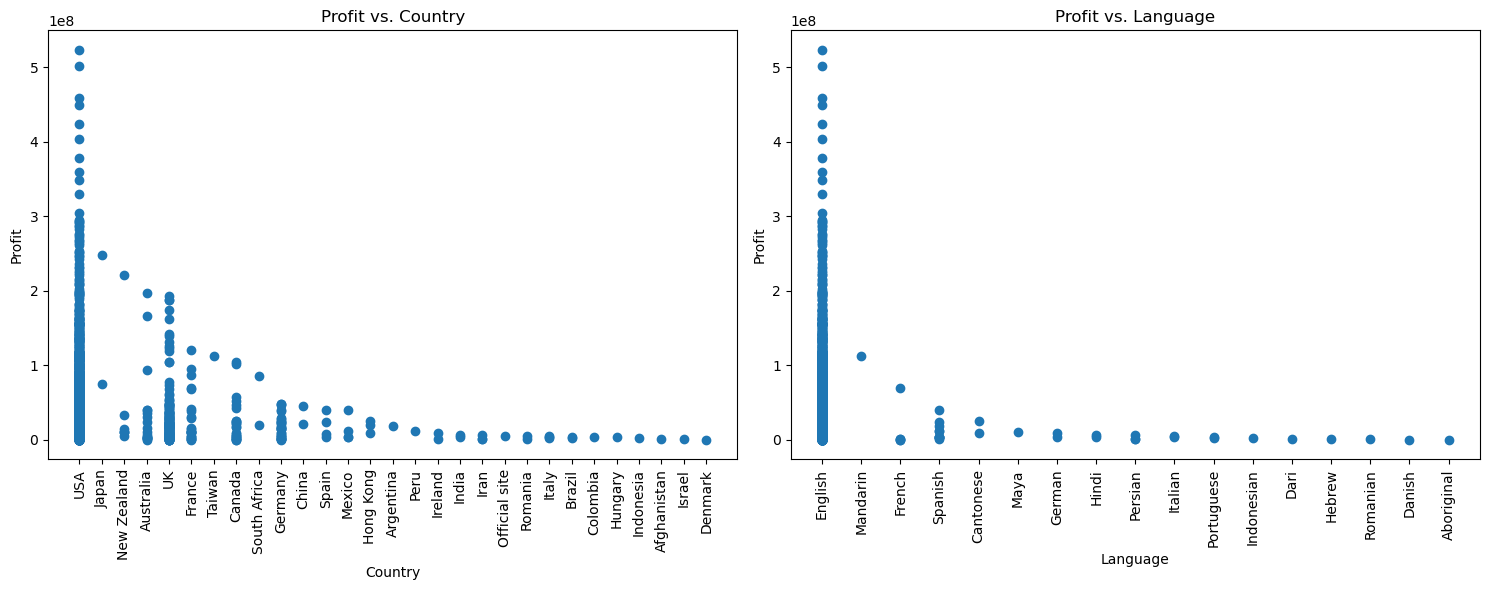

In [167]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#profit against country
axes[0].scatter(df['country'], df['profit'])
axes[0].set_title('Profit vs. Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Profit')
axes[0].tick_params(axis='x', rotation=90) 

#profit against language
axes[1].scatter(df['language'], df['profit'])
axes[1].set_title('Profit vs. Language')
axes[1].set_xlabel('Language')
axes[1].set_ylabel('Profit')
axes[1].tick_params(axis='x', rotation=90)  
plt.tight_layout()
plt.show()


We can clearly see here 95% of our data has movies released in USA and in Language English so thats playing a significant role in our analysis

Now we are done analysing cateogerical data , lets go in deeper analysis for numerical data now 

###  4c) Deeper Analysis in Numerical Columns

**Checking distrubution of all the relevant numerical columns**

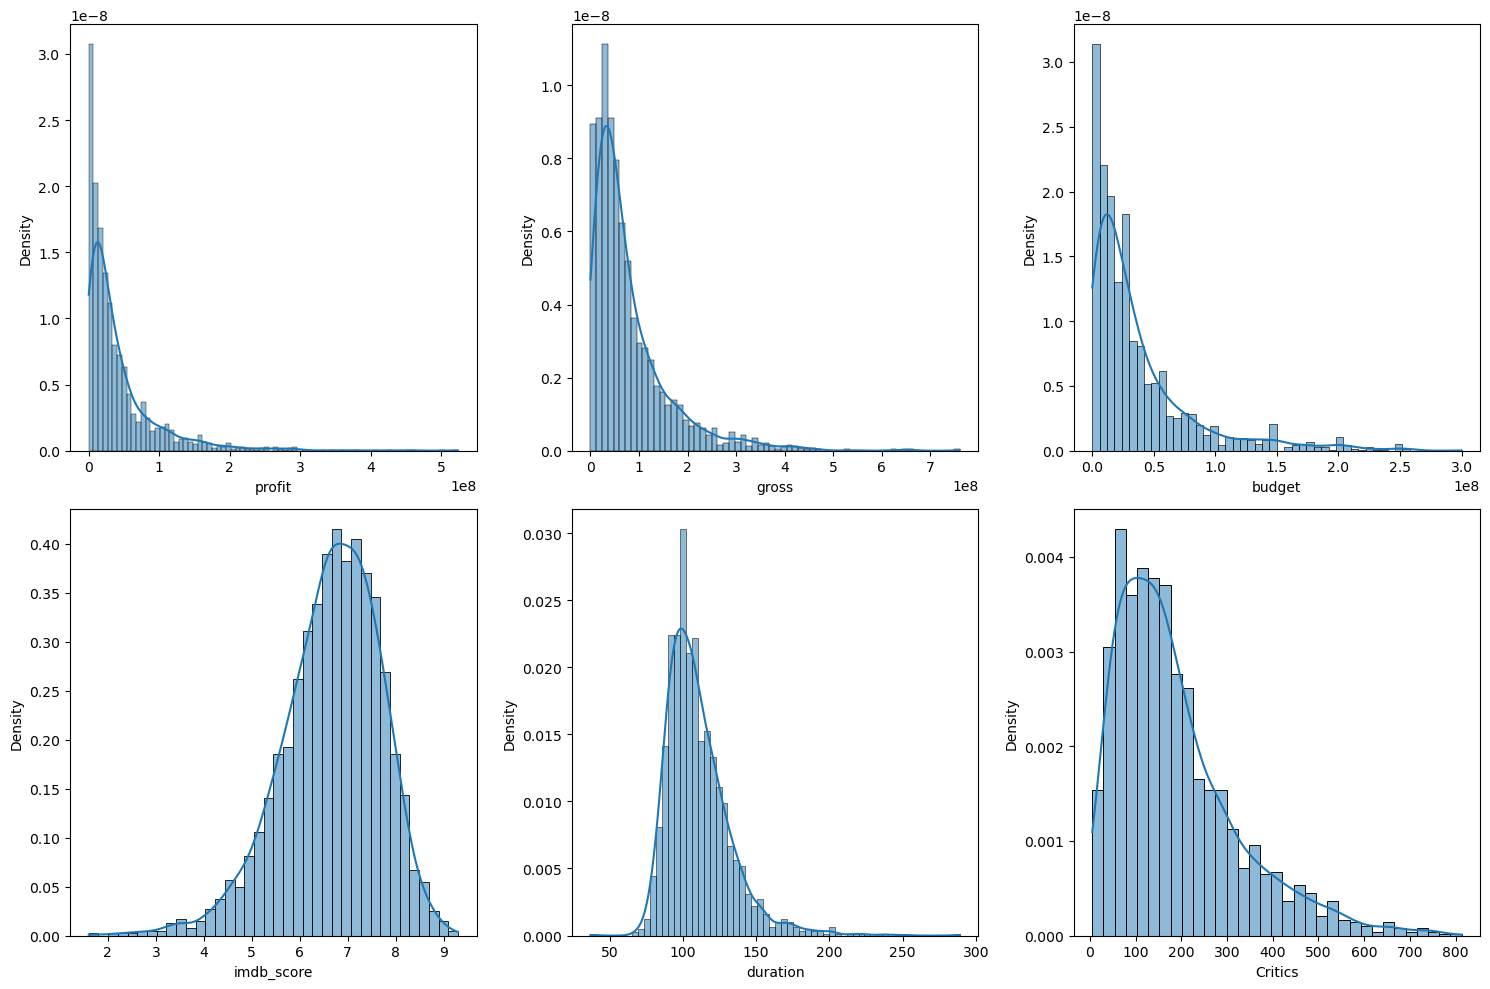

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

variables = ['profit', 'gross', 'budget', 'imdb_score', 'duration', 'Critics']

for var, ax in zip(variables, axes.flatten()):
    sns.histplot(df[var], kde=True, stat="density", ax=ax)

plt.tight_layout()
plt.show()

As I can see out of 6 plots from 1 to 6 just imbd score and duration look Gaussian , rest all the graphs are extremely deviated

**Plotting a P-P Plot for better understanding**

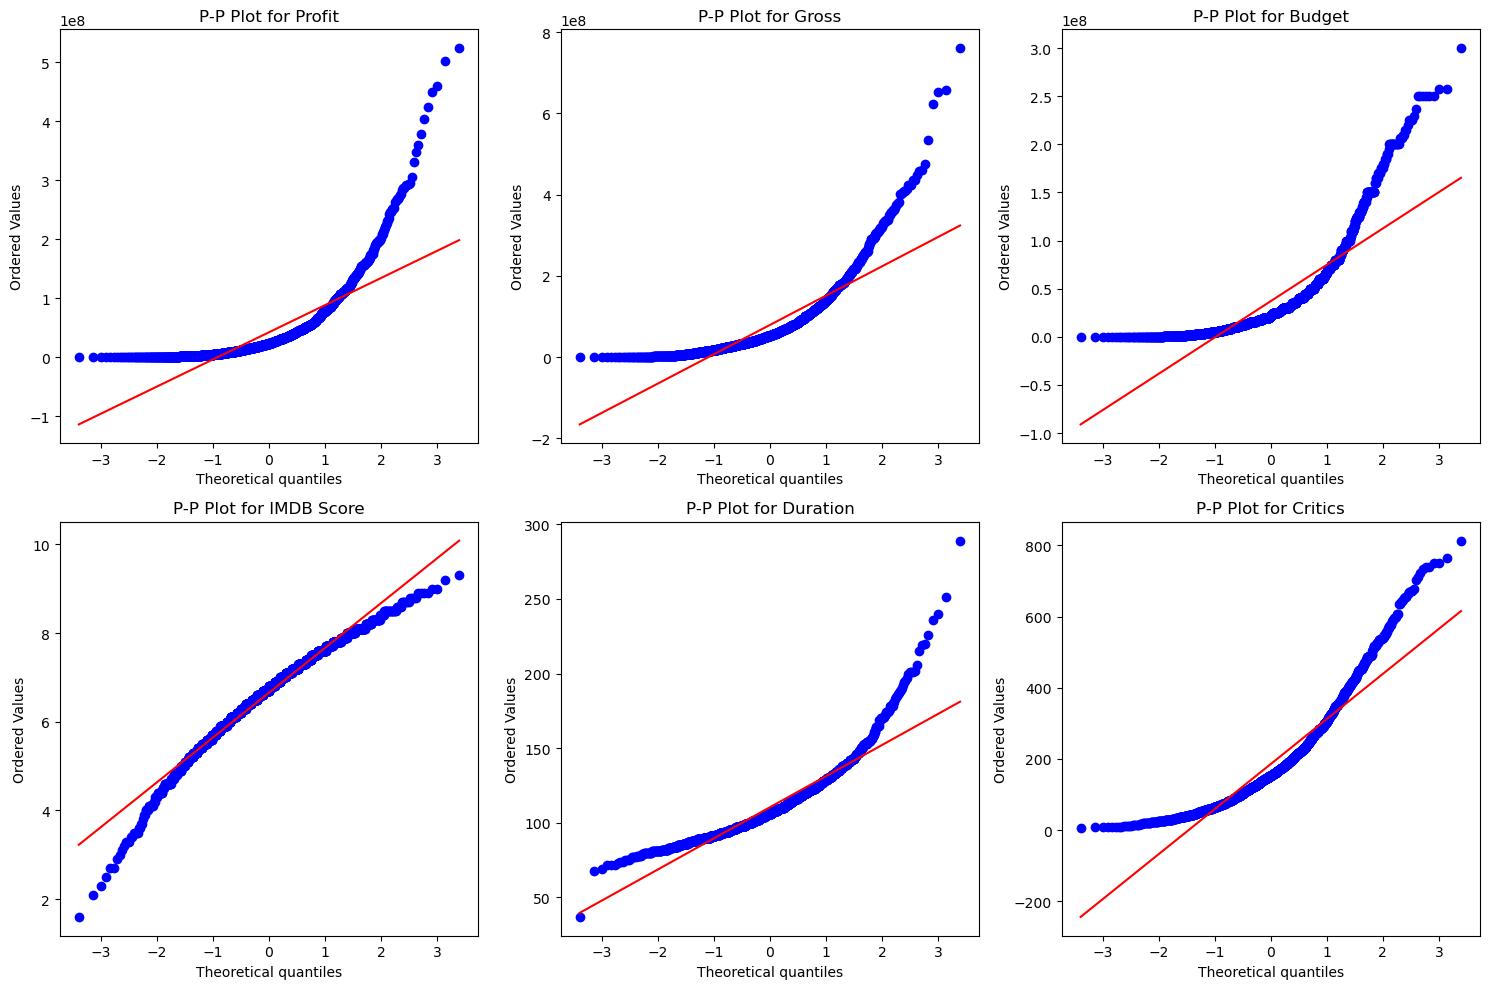

In [170]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# P-P plot for profit
stats.probplot(df['profit'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('P-P Plot for Profit')

# P-P plot for gross
stats.probplot(df['gross'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('P-P Plot for Gross')

#  P-P plot for budget
stats.probplot(df['budget'], dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('P-P Plot for Budget')

# P-P plot for imdb_score
stats.probplot(df['imdb_score'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('P-P Plot for IMDB Score')

#  P-P plot for duration
stats.probplot(df['duration'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('P-P Plot for Duration')

# P-P plot for critics
stats.probplot(df['Critics'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('P-P Plot for Critics')

plt.tight_layout()
plt.show()


We can see in the P-P plot none of them are looking Gaussian even the Imbd score and Duration Plot are not completely falling on the line , may be because of the outliers. we can analyse further

**Defining a Function to check for Outliers in all 6 columns**

In [49]:

# Defining a function to identify outliers based on IQR
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# To Identify outliers in each column
outliers_gross = identify_outliers(df['gross'])
outliers_profit = identify_outliers(df['profit'])
outliers_budget = identify_outliers(df['budget'])
outliers_imdb = identify_outliers(df['imdb_score'])
outliers_critics = identify_outliers(df['Critics'])
outliers_duration = identify_outliers(df['duration'])

# To count the number of outliers in each column
num_outliers_gross = outliers_gross.sum()
num_outliers_profit = outliers_profit.sum()
num_outliers_budget = outliers_budget.sum()
num_outliers_imdb = outliers_imdb.sum()
num_outliers_critics = outliers_critics.sum()
num_outliers_duration = outliers_duration.sum()

# To print the results
print(f"Number of outliers in 'gross': {num_outliers_gross}")
print(f"Number of outliers in 'profit': {num_outliers_profit}")
print(f"Number of outliers in 'budget': {num_outliers_budget}")
print(f"Number of outliers in 'imdb_score': {num_outliers_imdb}")
print(f"Number of outliers in 'critics': {num_outliers_critics}")
print(f"Number of outliers in 'duration': {num_outliers_duration}")


Number of outliers in 'gross': 136
Number of outliers in 'profit': 166
Number of outliers in 'budget': 153
Number of outliers in 'imdb_score': 39
Number of outliers in 'critics': 86
Number of outliers in 'duration': 64


We can see all the six columns have outliers which maybe the reasons of deviations in the graph. Lets remove them to see whether it makes any changes in our graphs

**Defining a Function to Remove Outliers and saving it in a new copy of Data Frame for testing**

In [174]:
# Defining a function to remove outliers based on IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Creating a new DataFrame without outliers
df_no_outliers = df.copy()
df_no_outliers['gross'] = remove_outliers(df_no_outliers['gross'])
df_no_outliers['profit'] = remove_outliers(df_no_outliers['profit'])
df_no_outliers['budget'] = remove_outliers(df_no_outliers['budget'])
df_no_outliers['imdb_score'] = remove_outliers(df_no_outliers['imdb_score'])
df_no_outliers['Critics'] = remove_outliers(df_no_outliers['Critics'])
df_no_outliers['duration'] = remove_outliers(df_no_outliers['duration'])
df_no_outliers = df_no_outliers.dropna()


**Plotting Hist PLots again for Data with no outliers**

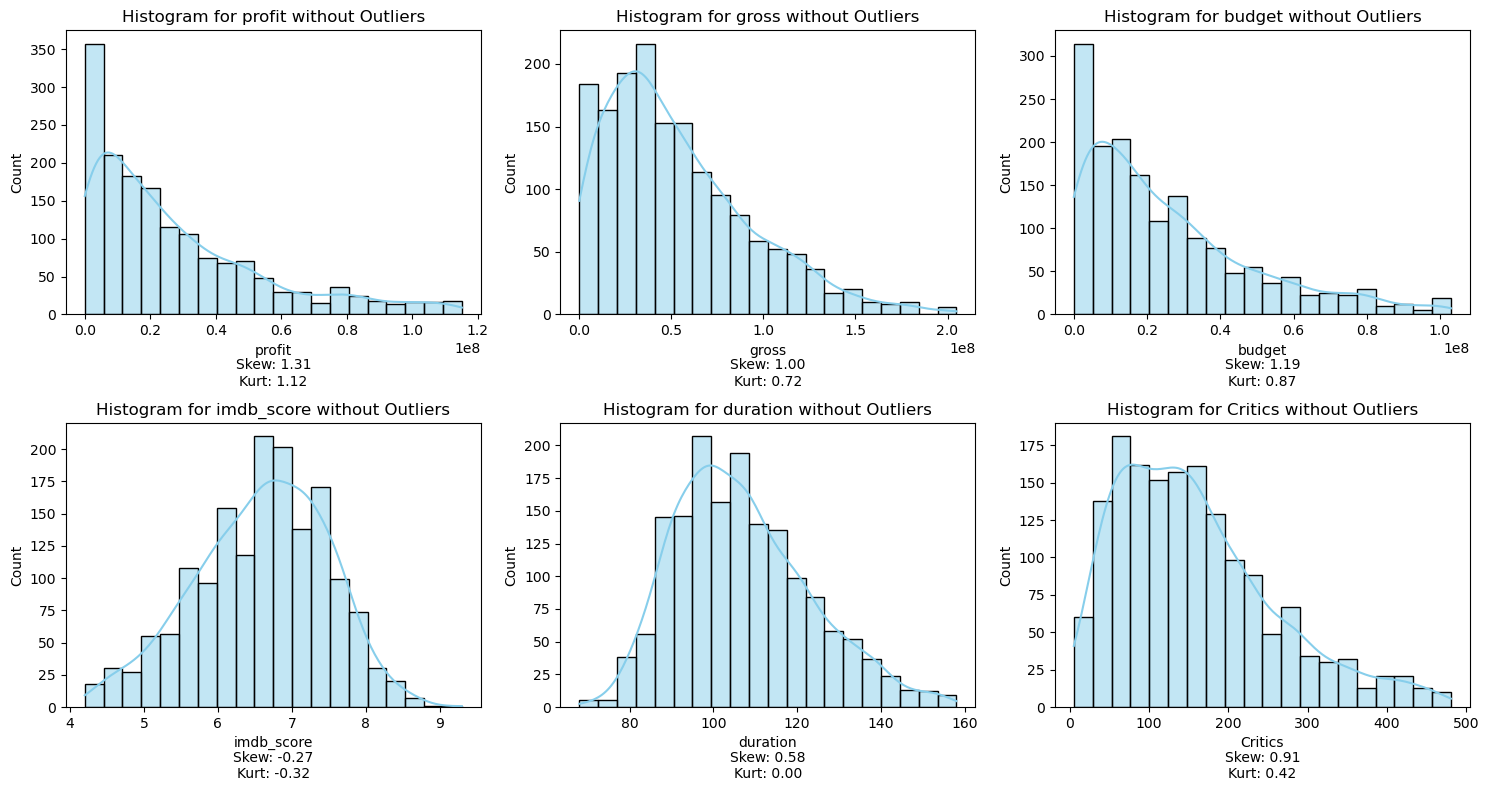

In [177]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

columns_to_analyze = ['profit', 'gross', 'budget', 'imdb_score', 'duration', 'Critics']


for i, col in enumerate(columns_to_analyze):
   
    sns.histplot(df_no_outliers[col], bins=20, kde=True, color='skyblue', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogram for {col} without Outliers')
    
    # Skewness and kurtosis
    skewness = df_no_outliers[col].skew()
    kurt = df_no_outliers[col].kurtosis()
    
    # Annotate skewness and kurtosis on the plot
    axes[i//3, i%3].annotate(f'Skew: {skewness:.2f}\nKurt: {kurt:.2f}', 
                             xy=(0.5, -0.25), xycoords='axes fraction',
                             ha='center', fontsize=10)

plt.tight_layout()
plt.show()


we can see there is no significant change in the plots except the imdb score and the durations looks a little better. The Skew and Kurosis for imdb is very less but there is some skew for the Duration but we can still consider them to be gaussian . Rest all are very high on skew and kurtosis


**Plotting a P-P PLot for Data with no outliers**

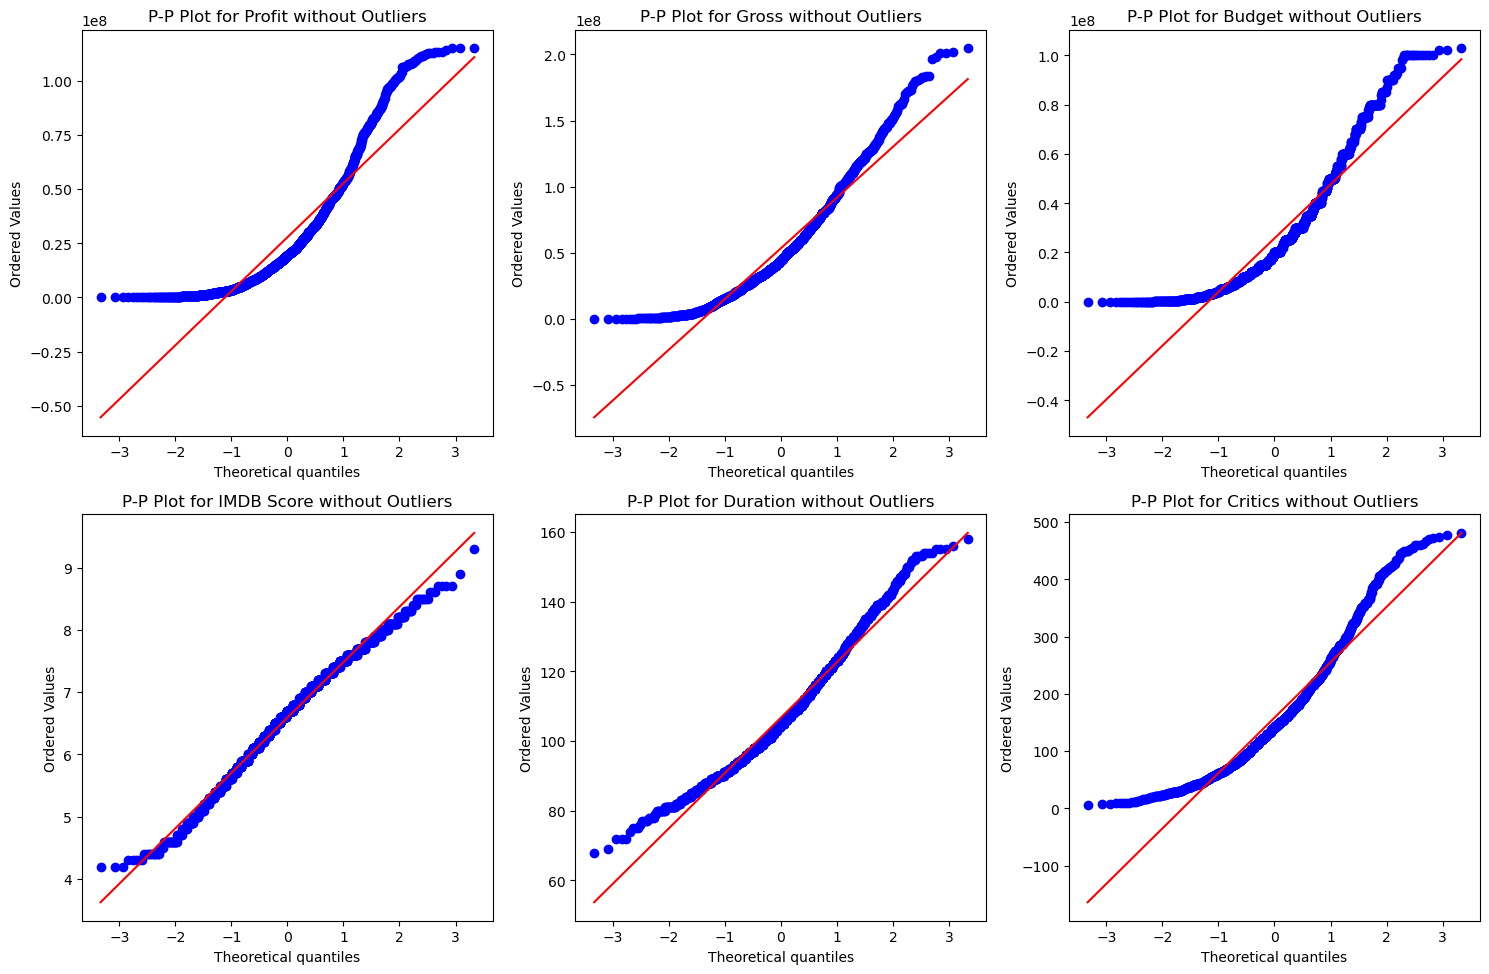

In [51]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# for profit
stats.probplot(df_no_outliers['profit'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('P-P Plot for Profit without Outliers')

# for gross
stats.probplot(df_no_outliers['gross'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('P-P Plot for Gross without Outliers')

# for budget
stats.probplot(df_no_outliers['budget'], dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('P-P Plot for Budget without Outliers')

# for imdb_score
stats.probplot(df_no_outliers['imdb_score'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('P-P Plot for IMDB Score without Outliers')

# for duration
stats.probplot(df_no_outliers['duration'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('P-P Plot for Duration without Outliers')

# for critics
stats.probplot(df_no_outliers['Critics'], dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('P-P Plot for Critics without Outliers')

plt.tight_layout()
plt.show()



Again no significant change in the graphs except imdb score and Duration looks little better from before . We can say that they are gaussian. Lets analyise them deeper

**Calculating, Mean, Median and Standard Deviation for the imdb score and Duration**

In [54]:
imdb_mean = df_no_outliers['imdb_score'].mean()
imdb_std = df_no_outliers['imdb_score'].std()
imdb_median = df_no_outliers['imdb_score'].median()

duration_mean = df_no_outliers['duration'].mean()
duration_std = df_no_outliers['duration'].std()
duration_median = df_no_outliers['duration'].median()


print(f"IMDb Score - Mean: {imdb_mean}, Std Dev: {imdb_std}, Median: {imdb_median}")
print(f"Duration - Mean: {duration_mean}, Std Dev: {duration_std}, Median: {duration_median}")

IMDb Score - Mean: 6.591955445544554, Std Dev: 0.8924018520296401, Median: 6.7
Duration - Mean: 106.74876237623762, Std Dev: 16.083874537534946, Median: 105.0


**Running a Kolmogorov-Smirnoff test on Imdb score and Duration**

In [56]:
from scipy.stats import kstest, norm

columns_of_interest = ['imdb_score','duration']
mus = [6.656328164082041, 110.42921460730365]
sigs = [1.0230568751207865, 22.127776784822]

for col, mu, sig in zip(columns_of_interest, mus, sigs):    
    clean_series = df[~df[col].isna()][col]  

    _, p_value = kstest(clean_series, cdf=norm(loc=mu, scale=sig).cdf) 
    print(f"The K-S test p-value for {col} is: {p_value}")


The K-S test p-value for imdb_score is: 4.196903734548573e-07
The K-S test p-value for duration is: 7.679984353777417e-20


The p-values  are extremely close to zero, indicating strong evidence to reject hypothesis that the data follows a normal distribution with the specified mean and standard deviation. Lets do one more test to conclude 

**Running a Lilliefors, D'Agostino's Test to conclude**

In [179]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest

columns_of_interest1 = ['imdb_score','duration']

for col in columns_of_interest1:    
    clean_series1 = df[~df[col].isna()][col]

    # Lilliefors test
    _, lilliefors_p_value = lilliefors(clean_series1)
    print(f"The Lilliefors test p-value for {col} is: {lilliefors_p_value}")

    # D'Agostino's K-squared test
    _, dagostino_p_value = normaltest(clean_series1)
    print(f"The D'Agostino's K-squared test p-value for {col} is: {dagostino_p_value}")
    
    print("\n")


The Lilliefors test p-value for imdb_score is: 0.0009999999999998899
The D'Agostino's K-squared test p-value for imdb_score is: 1.331003532161833e-39


The Lilliefors test p-value for duration is: 0.0009999999999998899
The D'Agostino's K-squared test p-value for duration is: 3.9259270052150616e-169




Both in Imbd Score and Duration: 
Lilliefors Test: The p-value is less than the common significance level of 0.05. This suggests that there is evidence to reject the null hypothesis that 'imdb_score' follows a normal distribution.
D'Agostino's K-squared Test: The p-value is significantly less than 0.05. This also indicates strong evidence against the distrubution being normal

So Its concluded that these graphs are not a Gaussian

**Applying Bootsrapping on Non-Gaussain Distrubution for imdb Score**

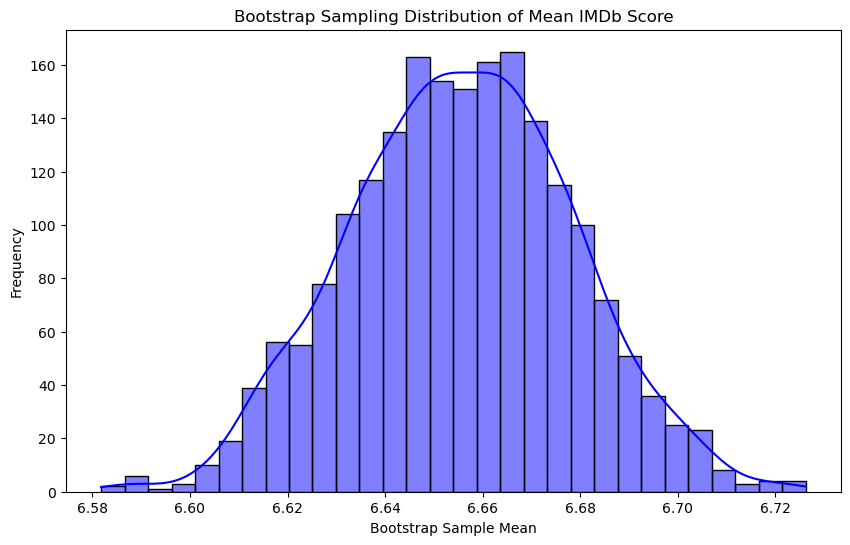

In [61]:

imdb_scores = df['imdb_score']
population_mean = df['profit'].mean()


num_bootstrap_samples = 1999

bootstrap_sample_imdb = [np.mean(np.random.choice(imdb_scores, size=len(imdb_scores), replace=True)) for _ in range(num_bootstrap_samples)]


plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_sample_imdb, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Bootstrap Sampling Distribution of Mean IMDb Score')
plt.xlabel('Bootstrap Sample Mean')
plt.ylabel('Frequency')
plt.show()


We can see above in the graph that we have created a finite gaussian bootstrapped version of imdb score with no outliers and the range falling from 6.58 to 6.72 around its mean. we can now do a Hypothesis test for the same

**Applying Bootsrapping on Non-Gaussain Distrubution for Budget**

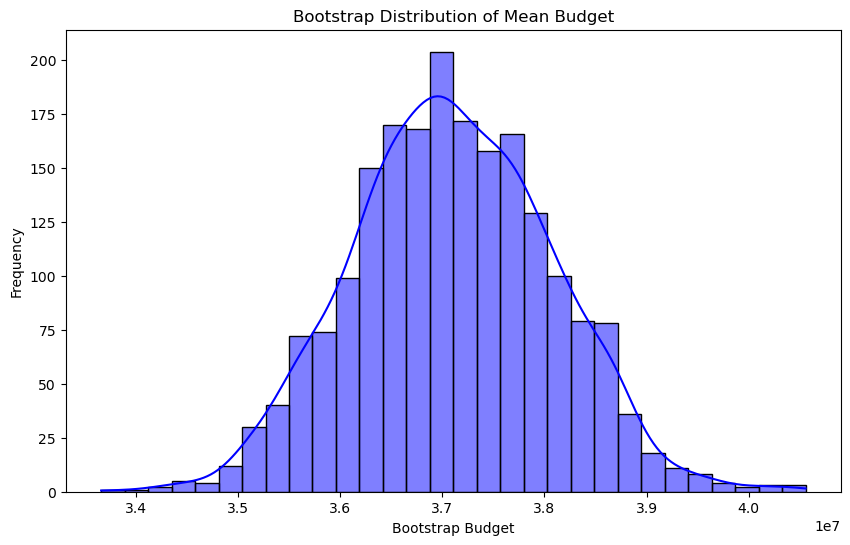

In [180]:
budget_samples = df['budget']

num_bootstrap_samples = 1999

bootstrap_sample_budget = [np.mean(np.random.choice(budget_samples, size=len(budget_samples), replace=True)) for _ in range(num_bootstrap_samples)]

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_sample_budget, bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Bootstrap Distribution of Mean Budget')
plt.xlabel('Bootstrap Budget')
plt.ylabel('Frequency')
plt.show()

We can see above in the graph that we have created a finite gaussian bootstrapped version of Budget with no outliers and the range falling from 4,3 to 4.0 around its mean. we can now do a Hypothesis test for the same

### STEP 5:  HYPOTHESIS TESTING

**1) HYPOTHESIS ON IMDB SCORE**

**Null Hypothesis (H0): The Average Profit for movies with scores less than or equal to 6.5 is greater than or equal to the movies of score 6.5**

**Alternative Hypothesis (H1): The Average Profit for movies with scores less than or equal to 6.5 is less than the movies of score 6.5**

I have created a null-Hypothesis and an alternate hypothesis againt it . Now I am running a One tailed T-Test for the same 

In [182]:
#Importing ttest_1samp to run a one tailed T test 
from scipy.stats import ttest_1samp

null_hypothesis_value = 6.5

# Perform a one-tailed t-test
t_statistic, p_value = ttest_1samp(bootstrap_sample_imdb, null_hypothesis_value)

# Set your significance level
alpha = 0.05

# Check for significance
if p_value < alpha:
    print(f"Reject the null hypothesis at the {100 * alpha:.1f}% significance level.")
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")
else:
    print(f"There isn't sufficient evidence to reject the null hypothesis at the {100 * alpha:.1f}% significance level.")
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")


Reject the null hypothesis at the 5.0% significance level.
T-statistic: 304.7650672243857, P-value: 0.0


The t-statistic is 304.77, indicating a large difference between the sample mean and the hypothesized mean.
The p-value is 0.0, which is less than significance level, providing strong evidence against the null hypothesis.
Based on these results, it suggests that there is significant evidence to support the claim that the average profit for movies with scores less than or equal to 6.5 is less than the movies with a score of 6.5

**1) HYPOTHESIS ON BUDGET**

**Null Hypothesis (H0): The average profit for movies with budgets less than or equal to 37 million is greater than or equal to the movies with budgets greater than 37 million**


**Alternative Hypothesis (H1): The average profit for movies with budgets less than or equal to 37 million is less than the movies with budgets greater than 37 million**


As I have bootsrapped samples which are around the mean , and a limited data I chose one Tailed Test for Mean

In [184]:
#Importing ttest_ind for a Two tailed T Test 
from scipy.stats import ttest_ind


bootstrap_sample_budget = np.array(bootstrap_sample_budget)

# Defining the two samples based on the budget threshold
bootstrap_sample_budget_low = bootstrap_sample_budget[bootstrap_sample_budget <= 37000000]
bootstrap_sample_budget_high = bootstrap_sample_budget[bootstrap_sample_budget > 37000000]

alpha = 0.05

# Performing a two-sample t-test
t_statistic, p_value = ttest_ind(bootstrap_sample_budget_low, bootstrap_sample_budget_high, alternative='less')


if p_value < alpha:
    print(f"Reject the null hypothesis at the {100 * alpha:.1f}% significance level.")
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")
else:
    print(f"There isn't sufficient evidence to reject the null hypothesis at the {100 * alpha:.1f}% significance level.")
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")


Reject the null hypothesis at the 5.0% significance level.
T-statistic: -59.234598463319635, P-value: 0.0


The t-statistic is highly negative, which indicates that the observed average profit for movies with budgets less than or equal to 37 million is significantly lower than the hypothesized average. The very low p-value (0.0) suggests that the probability of observing such an extreme result by chance is extremely low, supporting the rejection of the null hypothesis. Based on the analysis, there is strong evidence to suggest that the average profit for movies with budgets less than or equal to 37 million is significantly lower than movies with budgets greater than 37 million.

# Summary

**I have executed all my work in 5 Steps**

**Step 1** : I imported all the necessary Libraries which I would need to execute my analysis and I fetched my Imdb Data into my Python Notebook

**Step 2** : I Had a quick overview of the Data to chck from where to begin , how much cleaning it needs, what columns it has , what analysis I can do

**Step 3** : I started with Wrangling and cleaning , I found a lot of NAN values, Duplicates, redundant columns, Long column names, I cleaned all them I found a profit column to do analysis on and I dropped rows having profit below zero to make my data precise and more clean.

**Step 4**: In Step 4 I started with EDA of my Data starting from a heatmap to check correlations of all columns. and then I further divided my Steps into 3 Sub-Parts 

   **4.a)** I plotted Graphs of all numercial columns against profit that were relavant for analysis to check relationship with the profit and I made some decisions on which columns are closely related to profit 
    
   **4.b)** I checked the relationship of categorical columns with the profit to check their relationship 
    
   **4.c)** I did a deeper analysis on the numerical data and plotted more graphs to check their distrubution and I removed outliers to check if they were altering my results , did Lilliefors, D'Agostino's and Kolmogorov-Smirnoff  to  conclude all my graphs to be non-gaussian so I went with bootstrapping of my data and created bootstrapping samples against my data
    
**Step 5** I did two One-Tailed T Test  on my sample data because of bootstrapped samples and limited data and I concluded two decisons from those.


### **Observations and Conclusions**

1. Athough last movie was a Thriller, comedy, Action but failed but still Drama  comedy, Action, Thriller, Romance and action are few Genres which will result in high Profit

2. Directors name does not have any significant impact on the profit of the movie 

3. Actors name doesn not have any significat impact on the profit of the movie 

4. Releasing the Movie in English Language can be a reason og its success

5. Releasing the movie in USA can have a great impact on the movie in a positive way.

6. The average profit of a movie with Imdb score 6.5 and more is greater than the movie with imdb less than that. So Acheiving an Imdb of 6.5 and above can be a success

7. ALthough the last Budget was £500k , but if the budget manages to happen around £37 million and more the average profit would be more than movie of budget less than that

